<a href="https://colab.research.google.com/github/shivamtech29/CNN_Projects/blob/main/LumpyDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Code**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.layers import Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_train = []
y_train = []
image_size = 150

folderPath ='/content/drive/MyDrive/hcaugmented'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(0)
folderPath ='/content/drive/MyDrive/lcaugmented'
for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath,j))
    img = cv2.resize(img,(image_size, image_size))
    X_train.append(img)
    y_train.append(1)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train,y_train=shuffle(X_train,y_train,random_state=101)
X_train.shape

(2513, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,test_size=.1,random_state=101)

In [ ]:
y_train.shape

(2261,)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/content/CNN_aug_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
history=model.fit(X_train,y_train,epochs=10,validation_split=.1,callbacks=[best_model])

Epoch 1/10
64/64 [==============================] - ETA: 0s - loss: 2.4676 - accuracy: 0.5541

64/64 [==============================] - 17s 108ms/step - loss: 2.4676 - accuracy: 0.5541 - val_loss: 0.7779 - val_accuracy: 0.6256
Epoch 2/10
64/64 [==============================] - ETA: 0s - loss: 0.6652 - accuracy: 0.5929

64/64 [==============================] - 5s 84ms/step - loss: 0.6652 - accuracy: 0.5929 - val_loss: 0.7743 - val_accuracy: 0.4890
Epoch 3/10
63/64 [============================>.] - ETA: 0s - loss: 0.6276 - accuracy: 0.6562

64/64 [==============================] - 5s 83ms/step - loss: 0.6269 - accuracy: 0.6578 - val_loss: 0.6336 - val_accuracy: 0.6300
Epoch 4/10
63/64 [============================>.] - ETA: 0s - loss: 0.5951 - accuracy: 0.7073

64/64 [==============================] - 5s 83ms/step - loss: 0.5933 - accuracy: 0.7094 - val_loss: 0.6487 - val_accuracy: 0.6079
Epoch 5/10
63/64 [============================>.] - ETA: 0s - loss: 0.5760 - accuracy: 0.7178

64/64 [==============================] - 5s 82ms/step - loss: 0.5747 - accuracy: 0.7178 - val_loss: 0.5941 - val_accuracy: 0.6828
Epoch 6/10
63/64 [============================>.] - ETA: 0s - loss: 0.5800 - accuracy: 0.7173

64/64 [==============================] - 5s 83ms/step - loss: 0.5778 - accuracy: 0.7188 - val_loss: 0.5866 - val_accuracy: 0.6828
Epoch 7/10
63/64 [============================>.] - ETA: 0s - loss: 0.5596 - accuracy: 0.7212

64/64 [==============================] - 5s 83ms/step - loss: 0.5613 - accuracy: 0.7198 - val_loss: 0.7651 - val_accuracy: 0.5198
Epoch 8/10
63/64 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7178

64/64 [==============================] - 5s 83ms/step - loss: 0.5510 - accuracy: 0.7163 - val_loss: 0.6725 - val_accuracy: 0.6476
Epoch 9/10
63/64 [============================>.] - ETA: 0s - loss: 0.5201 - accuracy: 0.7436

64/64 [==============================] - 5s 83ms/step - loss: 0.5218 - accuracy: 0.7434 - val_loss: 0.5742 - val_accuracy: 0.7137
Epoch 10/10
63/64 [============================>.] - ETA: 0s - loss: 0.5050 - accuracy: 0.7515

64/64 [==============================] - 5s 83ms/step - loss: 0.5041 - accuracy: 0.7517 - val_loss: 0.5522 - val_accuracy: 0.7357


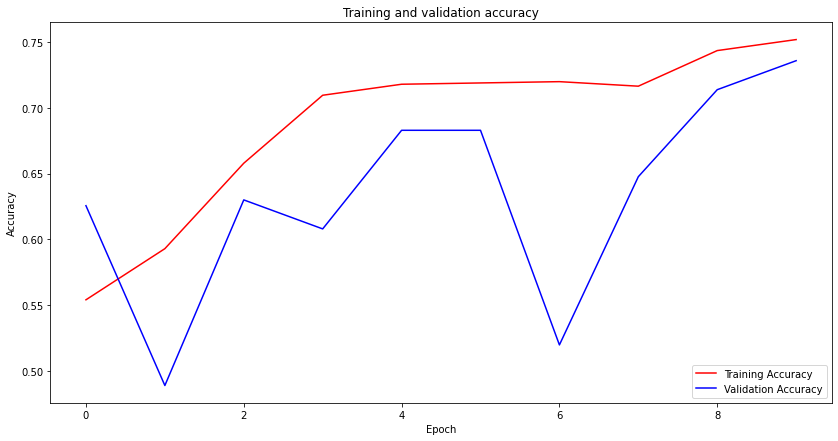

In [ ]:
#model.save('LumpyDisease.h5')

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

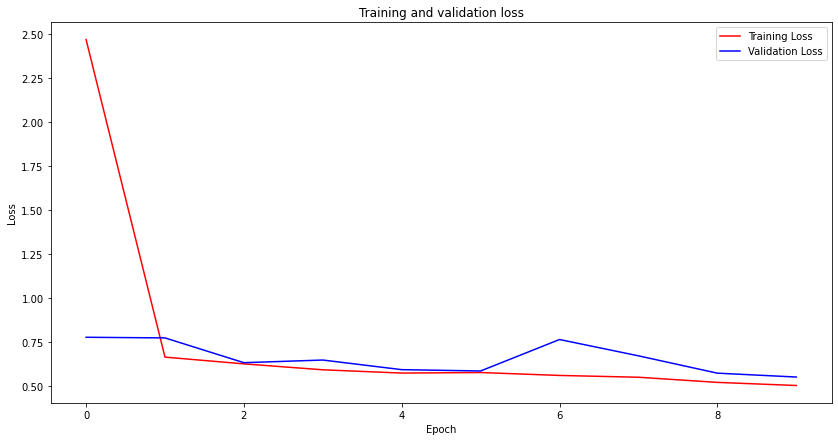

In [ ]:
fig2 = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss')

In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

8/8 [==============================] - 1s 115ms/step


In [ ]:
y_test.shape
pred.shape

(252,)

In [ ]:
accuracy = np.sum(pred==y_test)/np.size(pred)
print("Accuracy on testing dataset: {:.2f}%".format(accuracy*100))

Accuracy on testing dataset: 74.21%


In [ ]:
model.save('LumpyDisease.h5')

# Final Executable Code

In [ ]:
from keras.models import load_model
model = load_model('/content/LumpyDisease.h5')

In [ ]:
import cv2
import numpy as np
img = cv2.imread('/content/111.jpeg')
img = cv2.resize(img,(150, 150))
img_array = np.array(img)

img_array.shape
img_array=img_array.reshape(1,150,150,3)

a=model.predict(img_array)
indices = a.argmax()

1/1 [==============================] - 0s 388ms/step


In [ ]:
if indices==0:
    print('Probably a Healthy cow')
else:
    print('Probably an Infected cow')

Probably an Infected cow
